In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

try:
    # Python 3
    from urllib.request import urlopen, Request
except ImportError:
    # Fallback for Python 2
    from urllib2 import urlopen
    
%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
query = ("https://data.sfgov.org/resource/cuks-n6tp.json")
raw_data = pd.read_json(query)

In [3]:
raw_data.columns

Index([u':@computed_region_bh8s_q3mv', u':@computed_region_fyvs_ahh9',
       u':@computed_region_p5aj_wyqh', u':@computed_region_rxqg_mtj9',
       u':@computed_region_yftq_j783', u'address', u'category', u'date',
       u'dayofweek', u'descript', u'incidntnum', u'location', u'pddistrict',
       u'pdid', u'resolution', u'time', u'x', u'y'],
      dtype='object')

In [4]:
sf = raw_data

In [5]:
sf = sf.drop ([u':@computed_region_bh8s_q3mv', u':@computed_region_fyvs_ahh9',
       u':@computed_region_p5aj_wyqh', u':@computed_region_rxqg_mtj9',
       u':@computed_region_yftq_j783', u'descript', u'incidntnum',
       u'pdid', u'resolution', u'time',u'location'], axis = 1)

In [6]:
sf.head()

,address,category,date,dayofweek,pddistrict,x,y
0,500 Block of BRANNAN ST,BURGLARY,2016-11-02,Wednesday,SOUTHERN,-122.397616,37.777392
1,2300 Block of BRYANT ST,WARRANTS,2016-11-02,Wednesday,MISSION,-122.409592,37.756776
2,800 Block of BRYANT ST,VANDALISM,2016-11-02,Wednesday,SOUTHERN,-122.403405,37.775421
3,GENEVA AV / HOWTH ST,OTHER OFFENSES,2016-11-02,Wednesday,TARAVAL,-122.450118,37.722082
4,GENEVA AV / MISSION ST,OTHER OFFENSES,2016-11-02,Wednesday,INGLESIDE,-122.441018,37.716459


In [7]:
sf['date'] = pd.to_datetime(sf['date']) # i converted into numbers

In [14]:
sf1 = sf[(sf.date > '2015-01-01')]

In [16]:
sf1.head()

,address,category,date,dayofweek,pddistrict,x,y
0,500 Block of BRANNAN ST,BURGLARY,2016-11-02,Wednesday,SOUTHERN,-122.397616,37.777392
1,2300 Block of BRYANT ST,WARRANTS,2016-11-02,Wednesday,MISSION,-122.409592,37.756776
2,800 Block of BRYANT ST,VANDALISM,2016-11-02,Wednesday,SOUTHERN,-122.403405,37.775421
3,GENEVA AV / HOWTH ST,OTHER OFFENSES,2016-11-02,Wednesday,TARAVAL,-122.450118,37.722082
4,GENEVA AV / MISSION ST,OTHER OFFENSES,2016-11-02,Wednesday,INGLESIDE,-122.441018,37.716459


In [17]:
sf1.dayofweek.value_counts()

Monday       333
Tuesday      286
Wednesday    261
Sunday       120
Name: dayofweek, dtype: int64

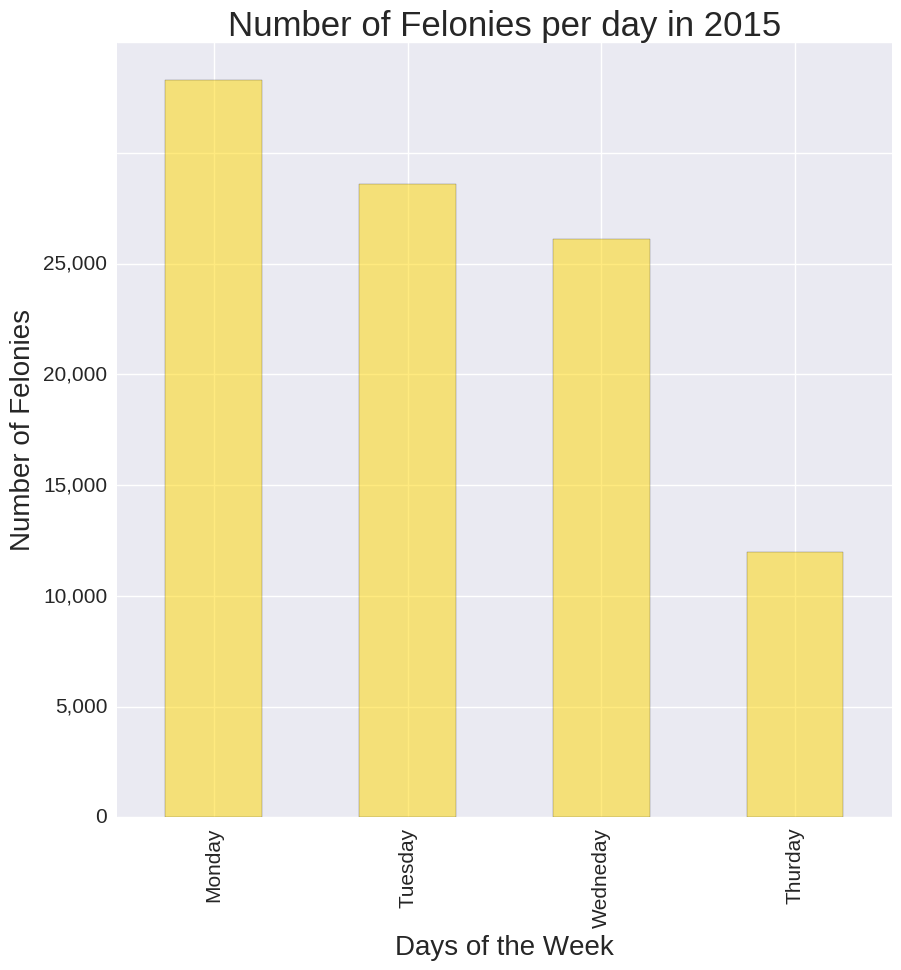

In [18]:
ax = plt.figure(figsize=(10,10))
ax = ((sf1['category'].groupby([sf1['date'].dt.weekday, sf1['dayofweek']]).count())).plot(kind="bar", 
                                                                                         color='Gold',
                                                                                         alpha=0.5, legend = False)

ax.xaxis.set_ticklabels(('Monday', 'Tuesday', 'Wedneday','Thurday', 'Friday', 'Saturday', 'Sunday'), fontsize=15)
ax.yaxis.set_ticklabels(('0', '5,000', '10,000', '15,000','20,000','25,000'), fontsize=15)
ax.set_xlabel('Days of the Week', size =20)
ax.set_ylabel('Number of Felonies', size = 20)
ax.set_title('Number of Felonies per day in 2015', size =25)